# Project: Penn Dot Bicycle Crashes
## Name: Melanie Duong
In this project, I utilized Python to build a CSV files from Penn Dot crashes data over 10 years period from 2012 to 2022 to discover the number of cyclists that were killed or suspected of serious injury in the accidents with automobiles.  
Variable Explaination:
1. MUNICIPALITY: Penn Dot municipal ID number
2. BICYCLE_DEATH_COUNT: Number of cyclists killed from crahses with automobiles
3. BICYCLE_SUSP_SERIOUS_INJ_COUNT: Number of cyclists suspected of serious injury from crashes with automobiles
4. BICYCLE_COUNT: Number of bicycles involved
5. AUTOMOBILE_COUNT: Number of automobiles involved

## 1. Data Cleaning

In [37]:
#Import pandas
import pandas as pd

#Set lists
df = []
selected_columns = ['MUNICIPALITY', 'BICYCLE_DEATH_COUNT', 'BICYCLE_SUSP_SERIOUS_INJ_COUNT', 'BICYCLE_COUNT', 'AUTOMOBILE_COUNT']

#Loop to open csv file
for year in range (2012, 2022):
    file_name = f"CRASH_Statewide_{year}.csv"
    file_path = f"C:/Document/Projects/CCLA ASM/Statewide_{year}/" + file_name
    crash_files = pd.read_csv(file_path, usecols = selected_columns)
    crash_files['Year'] = year
#Append data to list
    df.append(crash_files)
    
df = pd.concat(df)

municipality_name = pd.read_csv("C:/Document/Projects/CCLA ASM/municipalities_list.csv")
df = pd.merge(df, municipality_name, how='left', on='MUNICIPALITY')

#Filter the crashes with both bicycles and automobiles
df_filtered = df[(df['BICYCLE_COUNT'] != 0) & (df['AUTOMOBILE_COUNT'] != 0)]

In [38]:
#Group data by municipal ID
#df_filtered = df_filtered.groupby('MUNICIPALITY').sum()
df_filtered = df_filtered.groupby('MUNICIPALITY').agg({
    'Year': 'first', # Take the first value of the 'Year' column
    'Municipal Name': 'first',
    'BICYCLE_DEATH_COUNT': 'sum',
    'BICYCLE_SUSP_SERIOUS_INJ_COUNT': 'sum',
    'AUTOMOBILE_COUNT': 'sum',
    'BICYCLE_COUNT': 'sum'
})

#Reset index
df_filtered.reset_index(inplace = True)

#Create new variable
df_filtered['total_cyclists_killed_injured'] = df_filtered['BICYCLE_DEATH_COUNT'] + df_filtered['BICYCLE_SUSP_SERIOUS_INJ_COUNT']

#Drop unnecessary columns
df_filtered = df_filtered.drop(columns = ['AUTOMOBILE_COUNT', 'BICYCLE_COUNT'])

In [39]:
#Reset index
df_filtered.reset_index()

#Rearrange the order of columns
df_filtered = df_filtered[['Year', 'MUNICIPALITY', 'Municipal Name', 'total_cyclists_killed_injured', 'BICYCLE_SUSP_SERIOUS_INJ_COUNT', 'BICYCLE_DEATH_COUNT']]

#Sort values in descending order
df_filtered = df_filtered.sort_values('total_cyclists_killed_injured', ascending = False)

#Rename columns
renamed_columns = {'MUNICIPALITY':'Penn Dot municipal ID number', 'total_cyclists_killed_injured':'Total Number of Cyclists killed or suspected of serious injury from crashes with automobiles', 'BICYCLE_SUSP_SERIOUS_INJ_COUNT':'Total cyclists suspected of serious injury from crashes with automobiles over 10 years period', 'BICYCLE_DEATH_COUNT':'Total cyclists killed from crashes with automobiles over 10 years period'}
df_filtered = df_filtered.rename(columns = renamed_columns)

#Reset index and rename index column
df_crash = df_filtered.reset_index(drop = True)
df_crash.index = range(1, len(df_crash) + 1)
df_crash = df_crash.rename_axis('Index')

In [40]:
#Print table
df_crash.head(10)

,Year,Penn Dot municipal ID number,Municipal Name,Total Number of Cyclists killed or suspected of serious injury from crashes with automobiles,Total cyclists suspected of serious injury from crashes with automobiles over 10 years period,Total cyclists killed from crashes with automobiles over 10 years period
Index,,,,,,
1,2012,67301,Philadelphia City,86,71,15
2,2012,25302,Erie City,11,10,1
3,2012,39301,Allentown City,9,8,1
4,2012,2301,Pittsburgh City,9,5,4
5,2012,21402,Carlisle Boro,8,8,0
6,2012,36301,Lancaster City,7,7,0
7,2012,40304,Wilkes,5,3,2
8,2012,25213,Millcreek Twp,5,4,1
9,2012,22301,Harrisburg City,5,3,2


In [33]:
#Export data to CSV file
df_crash.to_csv('C:/Document/Projects/CCLA ASM/PennDot_Bicycle_Crashes.csv')

## 2. Data Visualization

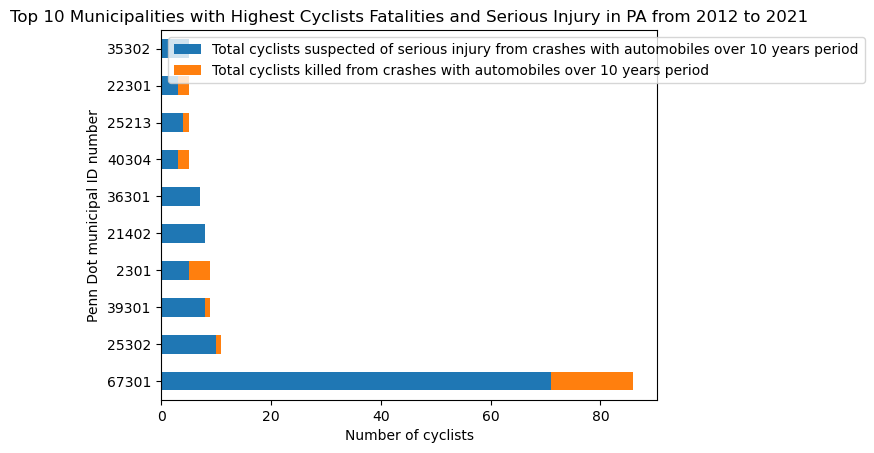

In [5]:
#Import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

#Get top 10 crashes with highest fatalities and serious injuries
top10_crashes = df_crash.head(10)

#Graph
bicycle_graph = top10_crashes.plot(x = 'Penn Dot municipal ID number', y = ['Total cyclists suspected of serious injury from crashes with automobiles over 10 years period', 'Total cyclists killed from crashes with automobiles over 10 years period'], kind = 'barh', stacked = True)

#Set legend, labels and title
bicycle_graph.legend(loc = 'upper left')
bicycle_graph.set_xlabel('Number of cyclists')
bicycle_graph.set_ylabel('Penn Dot municipal ID number')
bicycle_graph.set_title('Top 10 Municipalities with Highest Cyclists Fatalities and Serious Injury in PA from 2012 to 2021')

#Show graph
plt.show()